# Semantic change Desai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

sys.path.append("../src")
sys.path.append("../Marian")

from utils import *
from hist_al import *




In [2]:
df, X_df, y, targets = load_and_preprocess_data('esm3_coord')
pheno_columns=['delta_log_kd_ACE2', 'delta_log_kd_LY-CoV016', 'delta_log_kd_REGN10987', 'delta_log_kd_LY-CoV555', 'delta_log_kd_S309']
pheno=df[pheno_columns]
#to numpy
pheno=pheno.to_numpy()
print(pheno.shape)
fitnesses=bio_model(pheno)
print(fitnesses.shape)
top_10_percent_indexes=np.argsort(fitnesses, axis=0)[-int(len(fitnesses)/10):]
top_10_fitnesses=fitnesses[top_10_percent_indexes]
threshold_10_percent=np.min(top_10_fitnesses)


e:\VIRAL\plots\../src\utils.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(file_path)  # Load the tensor


loaded embeddings of shape torch.Size([3803, 1536])
(3122, 5)
(3122,)


In [ ]:
def plot_umap_subplots(umap_ucb, umap_greedy):
    # Set up the figure and subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    color_all_sequences = '#d3d3d3'  # Light grey
    color_top_10_percent = '#ff8c00'
    # Plot UCB UMAP
    axs[0].scatter(umap_ucb[:, 0], umap_ucb[:, 1], alpha=1, c=color_top_10_percent, s=10, label='Acquired sequences')
    axs[0].set_title('UCB Acquisition of CM dataset')
    axs[0].set_xlabel('UMAP1')
    axs[0].set_ylabel('UMAP2')
    axs[0].legend(loc='upper left')


    # Plot Greedy UMAP
    axs[1].scatter(umap_greedy[:, 0], umap_greedy[:, 1],alpha=0.7, c=color_top_10_percent, s=10, label='Acquired sequences')
    axs[1].set_title('Greedy Acquisition of CM dataset')
    axs[1].set_xlabel('UMAP1')
    axs[1].set_ylabel('UMAP2')
    axs[1].legend(loc='upper left')
    plt.tight_layout(pad=1.0)
    plt.savefig('../figures/umap_acquired.png', dpi=1200, bbox_inches='tight')  # Save with reduced whitespace
    plt.show()

In [4]:
from hist_al import *
df, X_df, y, targets = load_and_preprocess_data('esm3_coord', 'desai')
pheno_columns=['delta_log_kd_ACE2', 'delta_log_kd_LY-CoV016', 'delta_log_kd_REGN10987', 'delta_log_kd_LY-CoV555', 'delta_log_kd_S309']
pheno=df[pheno_columns]
#to numpy
pheno=pheno.to_numpy()
print(pheno.shape)
fitnesses=bio_model(pheno)
print(fitnesses.shape)
top_10_percent_indexes=np.argsort(fitnesses, axis=0)[-int(len(fitnesses)/10):]
top_10_fitnesses=fitnesses[top_10_percent_indexes]
threshold_10_percent=np.min(top_10_fitnesses)
print(fitnesses[top_10_percent_indexes])


e:\VIRAL\plots\../src\utils.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load(file_path)  # Load the tensor


loaded embeddings of shape torch.Size([32768, 1536])
(32768, 5)
(32768,)
[1.40892618 1.40895491 1.40895937 ... 1.50843825 1.51390486 1.51726211]


In [5]:
file = 'hist_al_desai_esm3_coord'


## semantic Change


In [6]:
import seaborn as sns


In [7]:
df_desai_complete = pd.read_csv('../data_desai/kd_desai/df_desai_processed.csv')
# df_desai_complete = pd.read_csv('../data_bloom/kd_bloom/df_bloom_processed.csv')
pheno_columns = ['delta_log_kd_ACE2', 'delta_log_kd_LY-CoV016', 'delta_log_kd_REGN10987', 
                 'delta_log_kd_LY-CoV555', 'delta_log_kd_S309']
pheno = df[pheno_columns].to_numpy()

print(pheno.shape)
fitnesses = bio_model(pheno)
print(fitnesses.shape)
df_desai_complete['fitness'] = fitnesses  
indexes_top_10_percent = np.argsort(fitnesses, axis=0)[-int(len(fitnesses)/10):]
print(fitnesses[indexes_top_10_percent])

(32768, 5)
(32768,)
[1.40892618 1.40895491 1.40895937 ... 1.50843825 1.51390486 1.51726211]


In [8]:
df_desai_complete

,Unnamed: 0,mutant_sequence,log10Kd_ACE2,log10Kd_CB6,log10Kd_CoV555,log10Kd_REGN10987,log10Kd_S309,count,average_date,delta_log_kd_ACE2,delta_log_kd_LY-CoV016,delta_log_kd_LY-CoV555,delta_log_kd_REGN10987,delta_log_kd_S309,fitness
0,0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,8.961147,9.952776,10.153433,9.983337,9.314233,29270.0,2021-01-19,0.038853,-0.152776,0.046567,0.016663,-0.014233,1.037094
1,1,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,8.141450,9.714128,10.098001,9.976880,9.363101,6.0,2021-11-29,0.858550,0.085872,0.101999,0.023120,-0.063101,0.997719
2,2,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,9.307811,9.684239,10.091608,10.053366,9.366271,102.0,2021-03-19,-0.307811,0.115761,0.108392,-0.053366,-0.066271,1.077649
3,3,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,9.035689,9.833378,10.119421,9.959428,9.315663,0.0,5,-0.035689,-0.033378,0.080579,0.040572,-0.015663,1.057319
4,4,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,8.820523,9.716320,9.991677,9.996232,9.280689,2.0,2021-03-31,0.179477,0.083680,0.208323,0.003768,0.019311,1.063113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,32763,NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNLAPFFT...,8.716156,5.000000,5.000000,5.000000,8.572664,0.0,5,0.283844,4.800000,5.200000,5.000000,0.727336,1.438905
32764,32764,NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNLAPFFT...,8.124485,5.000000,5.000000,5.000000,8.550620,0.0,5,0.875515,4.800000,5.200000,5.000000,0.749380,1.432913
32765,32765,NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNLAPFFT...,7.885902,5.000000,5.000000,5.000000,8.487258,0.0,5,1.114098,4.800000,5.200000,5.000000,0.812742,1.441985
32766,32766,NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNLAPFFT...,9.526724,5.000000,5.000000,5.000000,8.562622,0.0,5,-0.526724,4.800000,5.200000,5.000000,0.737378,1.468883


In [9]:
run_ucb_0 = pd.read_csv('../script_results/' +file + '/training_indices_history_ucb_run_1.csv', header=None)
run_ucb_0_AL = run_ucb_0.iloc[1:11, 0:10]
run_ucb_0_AL_flatten = run_ucb_0_AL.values.flatten()

In [10]:
run_greedy_0 = pd.read_csv('../script_results/' +file + '/training_indices_history_greedy_run_0.csv', header=None)
run_greedy_0_AL = run_greedy_0.iloc[1:11, 0:10]
run_greedy_0_AL_flatten = run_greedy_0_AL.values.flatten()

In [11]:
df_run_greedy_0 = df_desai_complete.iloc[run_greedy_0_AL_flatten]
df_run_ucb_0 = df_desai_complete.iloc[run_ucb_0_AL_flatten]

In [12]:
# Initialize an empty list to store all flattened arrays
all_runs_ucb = []

# Process runs 0 through 9
for run in range(10):
    # Read the CSV file for each run
    ucb_file_path = f'../script_results/{file}/training_indices_history_ucb_run_{run}.csv'
    run_ucb = pd.read_csv(ucb_file_path, header=None)
    
    # Select the specified rows and columns
    run_ucb_AL = run_ucb.iloc[1:11, 0:10]
    
    # Flatten the array and store it
    run_ucb_AL_flatten = run_ucb_AL.values.flatten()
    
    # Add to our list
    all_runs_ucb.append(run_ucb_AL_flatten)
all_runs_ucb_flatten = np.array(all_runs_ucb).flatten() 

In [13]:
all_runs_greedy = []

for run in range(10):
    greedy_full_path = f'../script_results/{file}/training_indices_history_greedy_run_{run}.csv'
    run_greedy = pd.read_csv(greedy_full_path, header=None)
    run_greedy_AL = run_greedy.iloc[1:11, 0:10]
    run_greedy_AL_flatten = run_greedy_AL.values.flatten()
    all_runs_greedy.append(run_greedy_AL_flatten)
all_runs_greedy_flatten = np.array(all_runs_greedy).flatten()

In [14]:
df_desai_ucb = df_desai_complete.iloc[all_runs_ucb_flatten]
df_desai_greedy = df_desai_complete.iloc[all_runs_greedy_flatten]


# Plot of semantic change alone

In [15]:

#index wildtype: mutant_sequence==NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST

wt_index=np.where(df['mutant_sequence']=='NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST')[0][0]
print(wt_index)
y[wt_index]

16384


tensor([-0.0337, -0.0054,  0.0407,  0.0060, -0.0432], dtype=torch.float64)

In [20]:
new_labels = ['log kd ACE2',
 'log kd LY-CoV016',
 'log kd REGN10987',
 'log kd LY-CoV555',
 'log kd S309',
 'fitness']

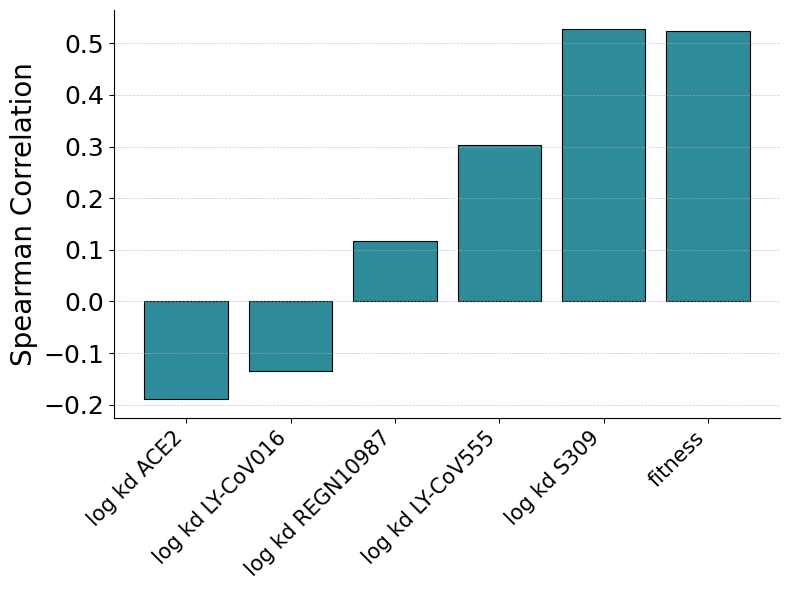

In [21]:
import scipy
#2E8B99'
#create a semantic change column= norm of the difference between the wildtype and the mutant
df['semantic_change']=np.linalg.norm(X_df-X_df[wt_index], axis=1)
#bar plot of spearman between semantic change and fitness and columns in target
spearman_correlation=[]
for column in pheno_columns:
    spearman_correlation.append(scipy.stats.spearmanr(df['semantic_change'], df[column])[0])
#add fitness corr
spearman_correlation.append(scipy.stats.spearmanr(df['semantic_change'], fitnesses)[0])
labels=pheno_columns.copy()
labels.append('fitness')
# Plot settings
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed
ax.bar(labels, spearman_correlation, color='#2E8B99', edgecolor='black', linewidth=0.8)

# Customize ticks and labels
ax.set_xticks(range(len(new_labels)))
ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=15)  # Rotate for readability
ax.set_ylabel('Spearman Correlation', fontsize=20)
# ax.set_xlabel('Semantic Change Categories', fontsize=14, fontweight='bold')
# ax.set_title('Spearman Correlation Between Semantic Change and Phenotypes', fontsize=16, fontweight='bold')
ax.tick_params(axis='y', labelsize=18)
# Add gridlines (optional)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save as a high-resolution image
plt.tight_layout()
plt.savefig("../figures/spearman_correlation_plot.png", format='png', dpi=1200)  # Change format if needed
plt.show()


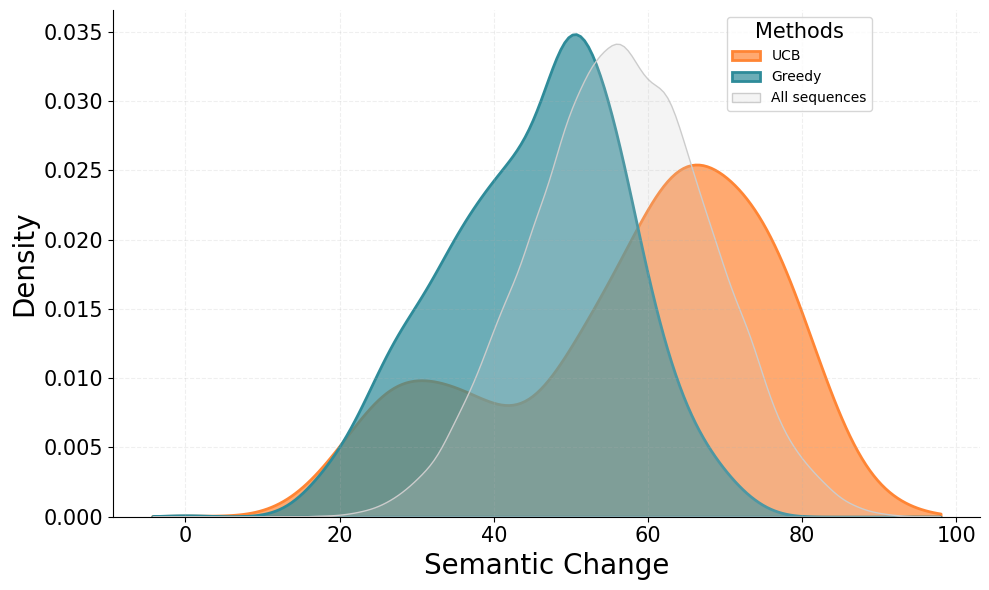

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Parameters
num_rounds = 10  # Number of rounds
NB_POINTS = 10

simulation_files_ucb = sorted(glob.glob("../script_results/hist_al_desai_esm3_coord/training_indices_history_UCB_run_*.csv"))
simulation_files_greedy = sorted(glob.glob("../script_results/hist_al_desai_esm3_coord/training_indices_history_greedy_run_*.csv"))

def get_enrichment(simulation_files, num_rounds):
  
    all_sets=[]
    for file_path in simulation_files:
        data = pd.read_csv(file_path)
        init_indexes = data.columns.astype(int)
        indexes_matrix = np.array(data.values, dtype=float)[:, :NB_POINTS].astype(int)

        current_indexes = set(init_indexes)

        for round_idx in range(num_rounds):
            current_indexes.update(indexes_matrix[round_idx, :])
            all_sets.append(current_indexes)

    return all_sets


all_sets_ucb = get_enrichment(simulation_files_ucb, num_rounds)
df['count_ucb']=0
for indexes in all_sets_ucb:
    df['count_ucb']+=df.index.isin(indexes)
all_sets_greedy = get_enrichment(simulation_files_greedy, num_rounds)
df['count_greedy']=0
for indexes in all_sets_greedy:
    df['count_greedy']+=df.index.isin(indexes)


fig, ax = plt.subplots(figsize=(10, 6))

colors = {
    'dataset': '#CCCCCC',
    'ucb': '#FF8534',
    'greedy': '#2E8B99'

}


sns.kdeplot(data=df,
            x='semantic_change',
            weights='count_ucb',
            color=colors['ucb'],
            alpha=0.7,
            label='UCB',
            fill=True,
            linewidth=2)


sns.kdeplot(data=df,
            x='semantic_change',
            weights='count_greedy',
            color=colors['greedy'],
            alpha=0.7,
            label='Greedy',
            fill=True,
            linewidth=2)

sns.kdeplot(data=df,
            x='semantic_change',
            color=colors['dataset'],
            alpha=0.2,
            label='All sequences',
            fill=True,
            linewidth=1)


plt.xlabel('Semantic Change', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(title='Methods', title_fontsize=15, fontsize=10, bbox_to_anchor=(0.7, 1), loc='upper left', frameon=True)

sns.despine()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('../figures/distribution_comparison_weighted.png', dpi=1200, bbox_inches='tight')
plt.show()



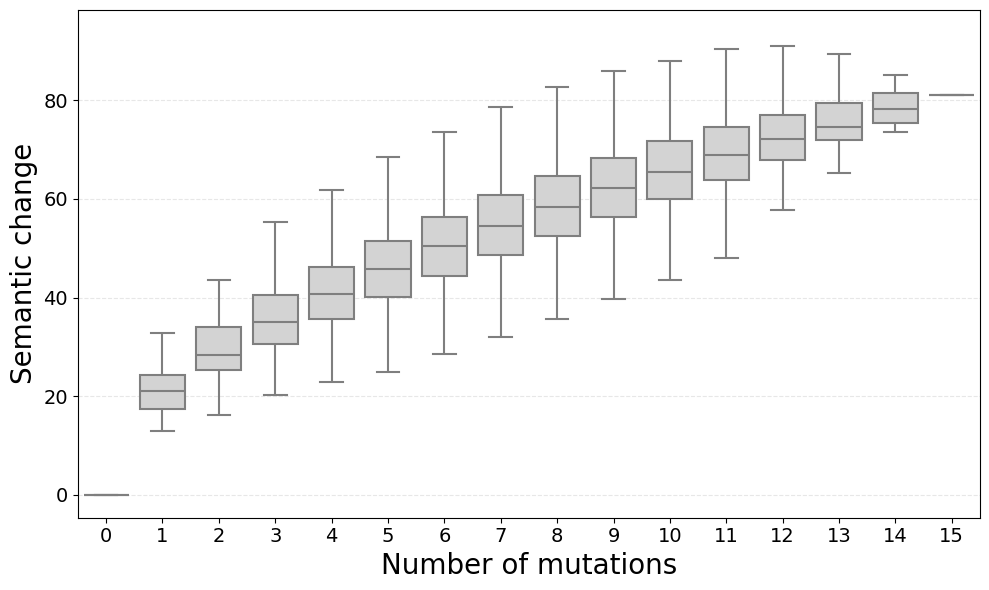

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
#mutation nb is hamming distance to the wildtype in mutant_sequence
df['mutation_nb'] = df['mutant_sequence'].apply(lambda x: np.sum(np.array(list(x)) != np.array(list(df['mutant_sequence'][wt_index]))))

# Ensure mutation count is treated as categorical and sorted numerically
df['mutation_nb'] = df['mutation_nb'].astype(int)
mutation_order = sorted(df['mutation_nb'].unique())

# Boxplot (candle plot)
sns.boxplot(
    x='mutation_nb', y='semantic_change', data=df,
    order=mutation_order,
    linewidth=1.5, fliersize=0,  # No outlier dots
    color='lightgray'
)

# Labels and style
plt.xlabel('Number of mutations', fontsize=20)
plt.ylabel('Semantic change', fontsize=20)
# plt.title('Semantic Change per Mutation Count (Boxplot)', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig('../figures/semantic_change_vs_mutation_nb.png', dpi=1200, bbox_inches='tight')
plt.show()
